# Plotting results

**Purpose of script:**

Plot data fusion results

- In: classification/regression prediction tif file
- Out: Plots

**ToDo:**

- plot general area in gray (elevation data as referece?)
- plot elevation lines, possibly include altitude labels
- plot prediction data on top
- plot microvave data grid on top

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import xarray
from functions import information

import numpy as np

## Plot elevation:

In [2]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

In [5]:
information(path_elevation)

BOUNDS:
    BoundingBox(left=-637000.0, bottom=-3349000.0, right=850000.0, top=-662000.0)
METADATA:
    {'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 1487, 'height': 2687, 'count': 1, 'crs': CRS.from_epsg(3413), 'transform': Affine(1000.0, 0.0, -637000.0,
       0.0, -1000.0, -662000.0)}
MORE CRS INFO:
    PROJCS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",70],PARAMETER["central_meridian",-45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",SOUTH],AXIS["Northing",SOUTH],AUTHORITY["EPSG","3413"]]
RESOLUTION:
    (1000.0, -1000.0)


Reference plot of elevation data:

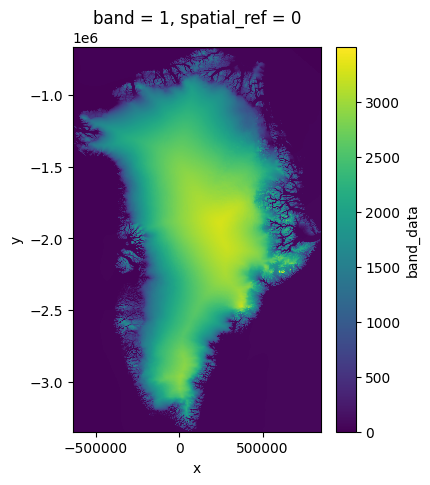

In [8]:
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
data_elevation.plot(ax=axes)
plt.draw()


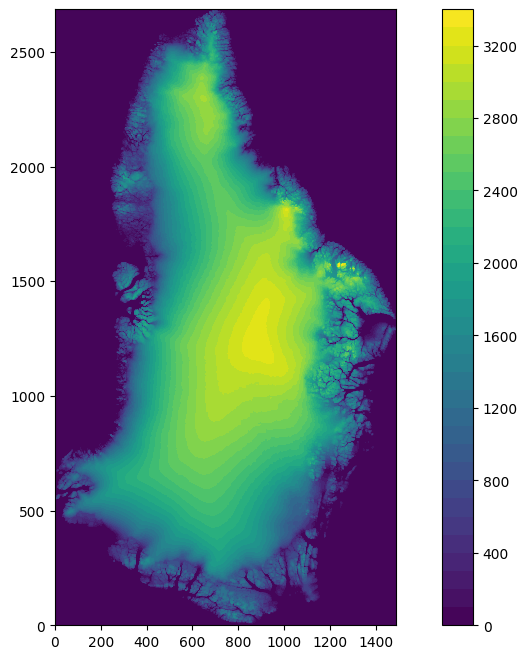

In [12]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_elevation[0], cmap = "viridis", levels = list(range(0, 3500, 100))) # levels from 0 to 3500 (data min and max val, step size = 100m)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# seems like the same shit as above just upside down

Contour lines:

In [150]:
import matplotlib
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "darkgray","gray", "dimgray" ])

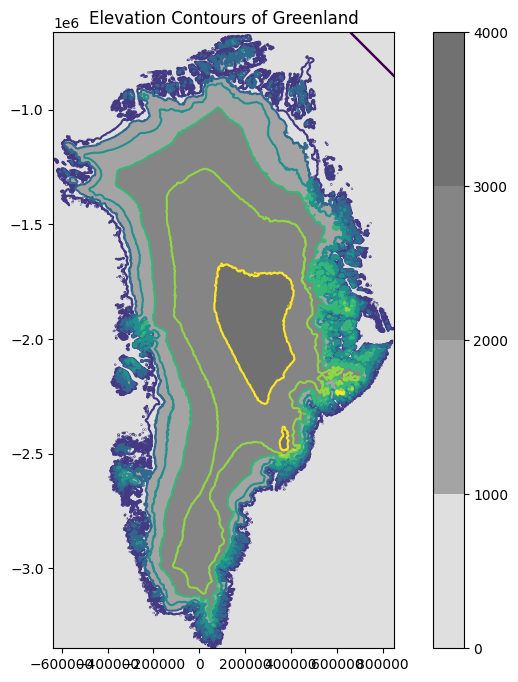

In [151]:
test1 = data_elevation['x'].values
test2 = data_elevation['y'].values
test11, test22 = np.meshgrid(test1, test2)


fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
plt.contour(test11, test22, data_elevation[0] , cmap = "viridis", # need to change to normal colors
            levels = list(range(0, 3500, 500))) # need to change style to gray lines and maybe numeric height indication

contour_filled = plt.contourf(test11, test22, data_elevation[0], levels = list(range(0, 4500, 1000)),  cmap = cmap1)
#plt.colorbar(contour_filled)

plt.title("Elevation Contours of Greenland")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# what tf is the line in the corner
# how to make continuos gray area where not water - ??? maybe not with this dataset but the other elevation dataset could plot all that not nan in one color?

old elevation data

In [160]:
# old elevation data
path_elevation1 =  r"../Data/elevation_data/Greenland_1km.tif"
data_elevation1 = xarray.open_dataarray(path_elevation1)


In [164]:
test_elevation = data_elevation1[0] > 0 

In [165]:
test_elevation2 = test_elevation.astype(int)

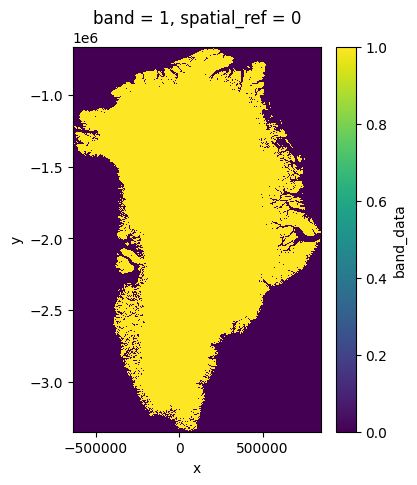

In [166]:
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_elevation2.plot(ax=axes)
plt.draw()
# seems like it plots a flat map of greeland ...  to use with elevation lines?

Plotting only a part of the map to see if its less convoluted

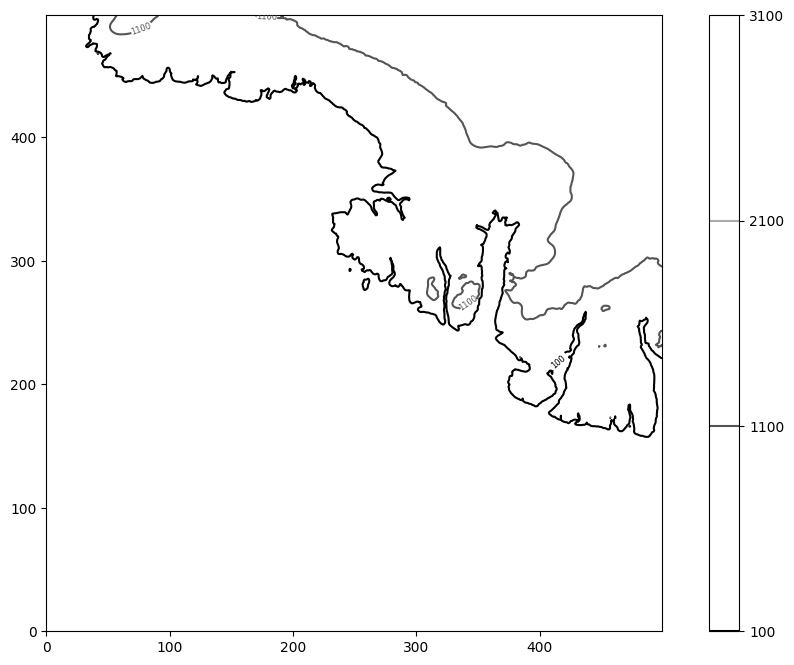

In [137]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
cp = plt.contour(data_elevation[0][:,0:500][0:500,:], cmap = 'gray', levels = list(range(100, 3500, 1000)))
plt.clabel(cp, inline=True, fontsize=6)           
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

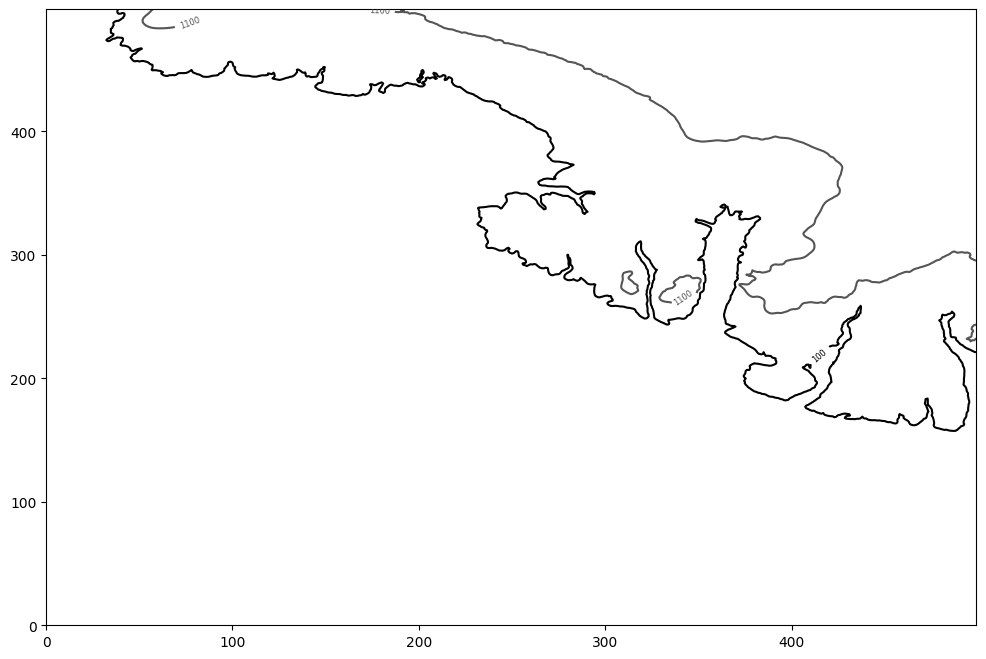

In [138]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
cp = plt.contour(data_elevation[0][:,0:500][0:500,:], cmap = 'gray', levels = list(range(100, 3500, 1000)))  
plt.clabel(cp, inline=True, fontsize=6)           

# to remove small parts:
# https://stackoverflow.com/questions/35633421/how-to-remove-omit-smaller-contour-lines-using-matplotlib
for level in cp.collections:
    for kp,path in reversed(list(enumerate(level.get_paths()))):
        # go in reversed order due to deletions!

        # include test for "smallness" of your choice here:
        # I'm using a simple estimation for the diameter based on the
        #    x and y diameter...
        verts = path.vertices # (N,2)-shape array of contour line coordinates
        diameter = np.max(verts.max(axis=0) - verts.min(axis=0))

        if diameter<10: # threshold to be refined for your actual dimensions!
            del(level.get_paths()[kp])  # no remove() for Path objects:(

# this might be necessary on interactive sessions: redraw figure
plt.gcf().canvas.draw()

## Plot predictions:

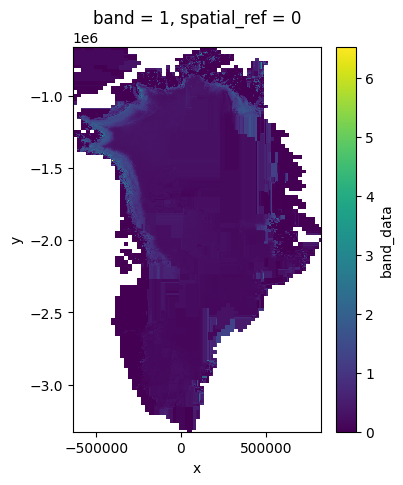

In [8]:
# test opening and plotting
test_data_tif = xarray.open_dataarray('test_prediction_out2.tif')
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_data_tif.plot(ax=axes)
plt.draw()

## Plot Microwave data grid: